## TEMA 2: ANÁLISE EXPERIMENTAL E ANALÍTICO DE PROGRAMAS
### SUBTEMA 2.1: ESTIMATIVA DO TEMPO DAS PRIMITIVAS LEVANDO EM CONTA AS OPERAÇÕES DE GESTÃO DOS LAÇOS

In [1]:
# IMPORTANDO BIBLIOTECAS
import numpy as np # biblioteca de cálculo numerico
from time import time # biblioteca que mede o tempo de execução do código python apenas
from matplotlib import pyplot as plt

# TOPICOS A SEGUIR:
> PONTO 1: CONTAGEM DE PRIMITIVAS
>> GESTÃO DE LAÇOS (LOOPS)

> PONTO 2: FORMULAÇÃO MATEMÁTICA DO PROBLEMA DA ESTIMATIVA TEÓRICO-PRÁTICA DOS TEMPOS UNITÁRIOS DAS PRIMITIVAS

> PONTO 3: ESTIMATIVA EXPERIMENTAL DO TEMPO DE TODAS AS PRIMITIVAS

> PONTO 4: CÁLCULO ANALÍTICO DO TEMPO UNITÁRIO DAS PRIMITIVAS

# PONTO 1: CONTAGEM DE PRIMITIVAS NA GESTÃO DE LOOPS

# forma genérica em python
###
for i in range(i_min,i_max,i_step):

    instruction block


## sequência do contador
##

i = [ i_min, i_min + i_step, i_min + 2 * i_step, i_min + 3 * istep,..., i_max - 1]

##
## exemplo 1
##
for i in range(n):


### onde

i_min = 0

i_max = n

i_step = 1

i = [0, 1, 2,...,n-1] 

##
## exemplo 2
##
for i in range(1,2*n,2):


### onde

i_min = 1

i_max = 2*n

i_step = 2

i = [1, 3, 5,...,2*n-1]



# número de repetições

A fórmula geral é 

>X  = 1 + |_ ( [ i_max - 1 ] - i_min ) / | i_step | _|

> onde:
>> |_ arg _| significa a parte inteira do argumento e 

>> | arg | siginifica o valor absoluto do argumento 



## Aplicando a fórmula aos exemplos acima

##
## repetições no exemplo 1
##

> X_1 = 1 + |_ ( ( n-1 ) - 0 ) / | 1 | _|= 1 + n - 1 = n

##
## repetições no exemplo 2
##

> X_2 = 1 + |_ ( (2*n-1) - 1 ) /  2   _|  = 1 + |_  ( 2*n - 2 ) / 2 _| = 1 + \_ 2*( n-1 ) / 2 _| = 1 + n -1 = n


# primitivas implícitas durante a execução de loop com X repetições

> 1. i = i_min # atribuição inicial expl. de variável => foca = [0,0,0,1] 

> 2. execute "instruction block" with i

> 3. if i < i_max then # controle de parada: oper de comparação '<>' com var=> foca = [0,0,1,0] * X 

>> 4.    i = i + i_step # incr. do contador: oper. '+' + atrib. expl. var.=>foca = [0,1,0,1] * X

> 5. else EXIT # saída

>> Total da gestão do laço: # EXPRESSÃO GERAL DOS LOOPS !!! 

>> foca de gestão de loop = [ 0, X, X, X + 1 ] 

onde

>X  = 1 + |_ ( [i_max - 1] - i_min ) / | i_step | _|


## RESUMO

### 1. Na gestão dos laços são usadas as primitivas:
> atrib. expl. de variável

> comparação <>

> operação matemática '+'
 ### 2. Não há chamada a função
 
 ### 3. São realizadas X operações, X comparações e X+1 atribuições, 
 #### onde X =número de iterações do laço

## EXERCÍCIO # 1:

### Calcule o número de primitivas executadas (o vetor FOCA) na gestão do seguinte loop:

> for i in range(29,4,-2):

>>instruction block


## EXERCÍCIO # 2:

### Calcule o número de primitivas executadas (o vetor foca) no seguinte código fonte:


>p=4

>for i in range(n):

>>a = p

# PONTO 2: FORMULAÇÃO MATEMÁTICA DO PROBLEMA DA ESTIMATIVA TEÓRICO-PRÁTICA DOS TEMPOS UNITÁRIOS DAS PRIMITIVAS

## Usando o vetor da contagem de primitivas (FOCA) de um código qualquer é possível estabelecer uma equação que define o tempo esperado de execução do mesmo

## Vamos passo a passo:
> assumindo códigos sem chamadas a função: ou seja F=0

## Se a componente O do vetor FOCA é o numero de operações matemáticas, e o tempo de uma operação matemática no ambiente de teste é denotado por to (desconhecido a princípio) , então:
> a contribuição das operações  matemáticas ao tempo total do código é:
>> CONTRIBUIÇÃO DAS OPER. MATEMÁTICAS =  O * to

## Da mesma forma, se C no vetor FOCA é o numero de comparações, e o tempo de uma comparação no ambiente de teste é denotado por tc (desconhecido a princípio) , então:
> a contribuição das comparações ao tempo total do código é:

>> CONTRIBUIÇÃO DAS COMPARAÇÕES= C * tc

## Por último, se A no vetor FOCA é o numero de atribuições, e o tempo de uma agribuição no ambiente de teste é denotado por ta (desconhecido a princípio) , então:
> a contribuição das atribuições ao tempo total do código é:

>> CONTRIBUIÇÃO DAS ATRIBUIÇÕES= A * ta

## ENTÃO, 
> COMO NÃO CONSIDERAMOS  MAIS TIPOS DE PRIMITIVAS, A SOMA DAS CONTRIBUIÇÕES DAS 3 PRIMITIVAS ACIMA, DEVE BATER COM O TEMPO DE EXECUÇÃO DO CÓDIGO

> CHAMEMOS ESSE TEMPO DE T

> ENTÃO, SOMANDO AS 3 CONTRIBUIÇÕES DAS PRIMITIVAS, OBTEMOS UMA "EQUAÇÃO LINEAR" QUE RELACIONA NUMERO DE PRIMITIVAS EXECUTADAS [O, C, A] COM TEMPOS UNITÁRIOS DAS PRIMITIVAS [To, Tc, Ta], DA FORMA:

>> T = O * to + C * tc + A * ta 



## NOTE QUE NOSSO PROBLEMA ATUAL É ACHAR OS TEMPOS UNITÁRIOS DAS PRIMITIVAS, QUE SÃO 3

### VOLTEMOS AO EXERCÍCIO 2

> NESSE EXERCÍCIO NÓS CALCULAMOS AS PRIMITIVAS DE GESTÃO DO LAÇO, MAS TIVEMOS QUE "ADICIONAR" A PRIMITIVA DE ATRIBUIÇÃO DE VARIÁVEL DO BLOCO DE INSTRUÇÕES 

> COMO PODERIAMOS DIFERENCIAR AS PRIMITIVAS DE GESTÃO DAS PRIMITIVAS DENTRO DO LAÇO (NO BLOCO DE INSTRUÇÃO)?  

>> PODEMOS DEFINIR UMA NOTAÇÃO QUE IDENTIFIQUE ÀS PRIMITIVAS QUE PERTENCEM À GESTÃO DO LAÇO E ÀS QUE ESTÃO NO BLOCO DE INSTRUÇÕES DENTRO DO LAÇO

>> POR EXEMPLO, USANDO UM SUBÍNDICE g PARA INDICAR ÁS DE GESTÃO DO LAÇO APENAS, DE FORMA QUE [Og, Cg, Ag] SEJA O VECTOR COM A CONTAGEM DAS PRIMITIVAS DE GESTÃO E [Ob, Cb, Ab], SEJA O VETOR COM A CONTAGEM DAS PRIMITIVAS DENTRO DO BLOCO DO LAÇO

>> DESTA FORMA TEMOS QUE 
>>> O = Og + Ob, 

>>> C =  Cg + Cb, e 

>>> A = Ag + Ab

## EQUAÇÃO GERAL PARA PRIMITIVAS EM LOOPS
> T =  (Og + Ob) * to + (Cg + Cb) * tc + (Ag + Ab) * ta

### onde as primitivas de gestão do laço são:
> Fg = 0

> Og = n

> Cg = n

> Ag = n+1

<!-- ### AGRUPANDO PELOS TEMPOS UNITÁRIOS DAS PRIMITIVAS TEMOS:
> T = (Og+Ob) * To + (Cg+Cb) * Tc + (Ag+Ab) * Ta  -->

## CONSIDERE AGORA O CASO COM 3 EXPERIMENTOS DA SEGUINTE FORMA: 
> EXPERIMENTO 1: SOMENTE COLOCAMOS 1 OPERAÇÃO "+" NO BLOCO DE INSTRUÇÕES E MEDIMOS O TEMPO TOTAL DO LOOP (TO)
>>for i in range(n):        # foca  = [0,n,n,n+1]
>>>**x = i + 2                # foca =[0,1,0,2] * n =>  atrib. da var i + atrib. resultado a x**

> neste caso 
>> Ob = n (adição)

>> Cb = 0

>> Ab = 2*n (implícita, explícita variável) 

> EXPERIMENTO 2: SOMENTE COLOCAMOS 1 COMPARAÇÃO NO BLOCO DE INSTRUÇÕES E MEDIMOS O TEMPO TOTAL DO LOOP (TC)
>>for i in range(n):         # foca = [0,n,n,n+1] 
>>>**b = i < 10               # foca =[0,0,1,2] * n**

> neste caso
>> Ob = 0

>> Cb = n (<)

>> Ab = 2*n (implícita, explícita variável) 

> EXPERIMENTO 3: SOMENTE COLOCAMOS 1 ATRIBUIÇÃO EXPLICITA DE VARIAVEL NO BLOCO DE INSTRUÇÕES E MEDIMOS O TEMPO TOTAL DO LOOP (TA)
>>for i in range(n):             # foca  = [0,n,n,n+1]
>>>**a = i                         # foca =[0,0,0,2] * n**

> neste caso:
>> Ob = 0

>> Cb = 0

>> Ab = 2*n (expl. de variável)



# ESCREVENDO AS EQUÃÇOES DE CADA EXPERIMENTO, SUSBTITUINDO OS NÚMEROS DE PRIMITIVAS NO LAÇO DE GESTÃO E NO BLOCO DE INSTRUÇÕES DO LAÇO, TEMOS: 
>OPERAÇÕES:
>> TO =  (n + n) * to + (n + 0) * tc + (n+1 + 2n) * ta

>igual a
>> TO =  2n * to + n * tc + (3n+1) * ta

> COMPARAÇÕES:
>> TC =  (n + 0) * To + (n + n) * tc + (n+1 + 2n) * ta

> igual a 
>> TC =  n * to + 2n * tc + (3n+1) * ta

> ATRIBUIÇÕES:
>> TA =  (n + 0) * to + (n + 0) * tc + (n+1 + 2n) * ta

> igual a
>> TA =  n * to + n * tc + (3n+1) * ta


# existem diferentes formas de resolver o problema de calcular os tempos unitários das 3 primitivas to, tc, e ta, dispondo de 3 equações lineares. As principais são:
> Algébrica: 
>>transformando as equações em vetores e matrizes e achando sua solução de forma numérica

> Analítica/Matemática: 
>>fazendo transformações e substituições no sistema de equações originais, permitndo obter expressões para o cálculo das 3 incôgnitas



# Contudo, em qualquer caso, começamos com a escrita do sistema de equações:
>TO =  2n * to + n * tc + (3n+1) * ta

>TC =  n * to + 2n * tc + (3n+1) * ta

>TA =  n * to + n * tc + (3n+1) * ta

> Observe que é importante manter uma ordem na hora de escrever as equações, respeitando a posição das variáveis medidas experimentalmente (TO, TC, TA) e das incôgnitas (To, Tc, Ta)

# SELECIONAMOS A ABORDAGEM ANALÍTICO/MATEMÁTICA:
> Usamos 
>>subtração de equações

>>substituição de algumas variáveis (incôgnitas) em função d outras

>>solução de equações simples

# SUBTRAINDO A TERCEIRA EQUAÇÃO, DAS DUAS PRIMEIRAS, OBTEMOS DUAS NOVAS EQUAÇÕES
>TO-TA =  (2n-n) * to + (n-n) * tc 

>TC-TA =  (n-n) * to + (2n-n) * tc 

## RESOLVENDO CADA EQUAÇÃO OBTEMOS:
> PRIMEIRA EQUAÇÃO:
>> TO-TA = n to

### pelo que, resolvendo a equação anterior obtemos a expressão de cálculo da primeira das 3 incôgnitas em função dos dados experimentais:
> to = (TO-TA) / n

###

> SEGUNDA EQUAÇÃO:
>> TC-TA = n tc

### pelo que, resolvendo a equação anterior obtemos a expressão de cálculo da segunda das 3 incôgnitas em função dos dados experimentais:
> tc = (TC-TA) / n


## Conhecendo 2 das 3 incôgnitas, To e Tc, podemos calcular a terceira incôginita, Ta, usando qualquer uma das 3 equações originais. 
> Seja a equação de TA

>TA =  n * to + n * tc + (3n+1) * ta

> então:

>> TA - n to - n tc = (3n+1) ta

> pelo que: 

>> ta = (TA - n to - n tc) / ( 3n+1)

## substituindo agora as expressoes achadas para To e Tc, temos:

>> ta = (TA - n (TO-TA) / n  - n (TC - TA ) / n) / ( 3n+1)

## fazendo as operações indicadas temos:

>> ta = (TA - TO + TA   - TC + TA ) / ( 3n+1)

## que resulta em 
> ta = (3TA - TO - TC) / ( 3n+1)


# ENTÃO, ASSIM, DE FORMA SIMPLES, OBTIVEMOS AS FÓRMULAS PARA CALCULAR OS TEMPOS UNITÁRIOS DAS PRIMITIVAS A PARTIR DOS DADOS DE EXPERIMENTOS, NOS QUAIS MEDIMOS O TEMPO DE n PRIMITIVAS CONSECUTIVAS DE CADA TIPO (O,C,A).

# PONTO 3: ESTIMATIVA EXPERIMENTAL DO TEMPO DE TODAS AS PRIMITIVAS
> TAREFA EXPERIMENTAL: ACHAR TO, TC e TA CONFIÁVEIS 
>> COMO APRENDIMOS A FAZER, OU SEJA COM "n" E "R" SUFICIENTEMENTE GRANDES

In [2]:
# 2. precisamos definir o número de repetições
n = int(2 * 10 ** 6)
R = 500 # por exemplo 1000

## EXECUÇÃO DOS EXPERIMENTOS

In [3]:
# repetindo o experimento com ATRIBUIÇÕES
TIC = time()

#vetores de dados experimentais

to = [] # tempos de n iterações do loop para cada repetição
tc = []
ta = []

# vetores de controle de qualidade

Mo = [] # media
So = [] # desvio
Vo = [] # variabilidade

Mc = []
Sc = []
Vc = []

Ma = []
Sa = []
Va = []

nprn = 50

for r in range(R):

    if r % nprn == 0:
        print("repetition", r," em {:.2f}".format((time()-TIC)/60),"minutos")
        
    # operações ----------------------------------------------------------------
    tic = time() 
    for i in range(n): 
        x = i + 2 
    toc = time() 

    to.append(toc-tic) # foca = [1,2,0,2] * R <<<<<<<<<<< NÃO CONTA
    
    Mo.append(np.mean(to))
    So.append(np.std(to))
    Vo.append(So[-1]/Mo[-1])
    
    # comparações -----------------------------------------------------------
    tic = time() 
    for i in range(n): 
        b = i < 10 
    toc = time() # foca = [1,0,0,0] * R

    tc.append(toc-tic) # foca = [1,2,0,2] * R <<<<<<<<<<< NÃO CONTA
    
    Mc.append(np.mean(tc))
    Sc.append(np.std(tc))
    Vc.append(Sc[-1]/Mc[-1])
    
     # atribuções de var ----------------------------------------------------
        
    tic = time() 
    for i in range(n): 
        a = i 
    toc = time() # foca = [1,0,0,0] * R

    ta.append(toc-tic) # foca = [1,2,0,2] * R <<<<<<<<<<< NÃO CONTA
    
    Ma.append(np.mean(ta))
    Sa.append(np.std(ta))
    Va.append(Sa[-1]/Ma[-1])
    
TO =  np.mean(to)
TC =  np.mean(tc)
TA =  np.mean(ta)

print("tempos médios dos loop com",n,"primitivas sucessivas em",R,"repetições = \n[O,C,A] = [",TO,TC,TA,"]")

print("Tempo do estudo: ",(time()-TIC)/60,"minutos")


repetition 0  em 0.00 minutos
repetition 50  em 0.46 minutos
repetition 100  em 0.93 minutos
repetition 150  em 1.42 minutos
repetition 200  em 1.91 minutos
repetition 250  em 2.41 minutos
repetition 300  em 2.92 minutos
repetition 350  em 3.43 minutos
repetition 400  em 3.92 minutos
repetition 450  em 4.41 minutos
tempos médios dos loop com 2000000 primitivas sucessivas em 500 repetições = 
[O,C,A] = [ 0.24046602487564087 0.19944131803512574 0.14783018589019775 ]
Tempo do estudo:  4.903064405918121 minutos


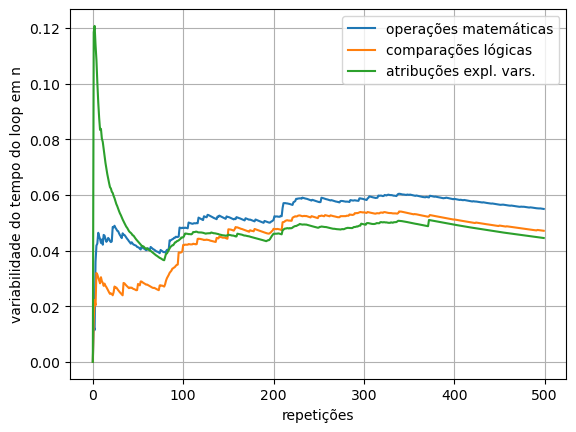

In [4]:
# controle de qualidade quantitativo - Estabilização da variabilidade < 0.15

plt.plot(Vo,label="operações matemáticas")
plt.plot(Vc,label="comparações lógicas")
plt.plot(Va,label="atribuções expl. vars.")
plt.xlabel('repetições')
plt.ylabel('variabilidade do tempo do loop em n')
plt.legend()
plt.grid()
plt.show()

# NÃO ESQUECENDO PLOTAR OS DADOS BRUTOS

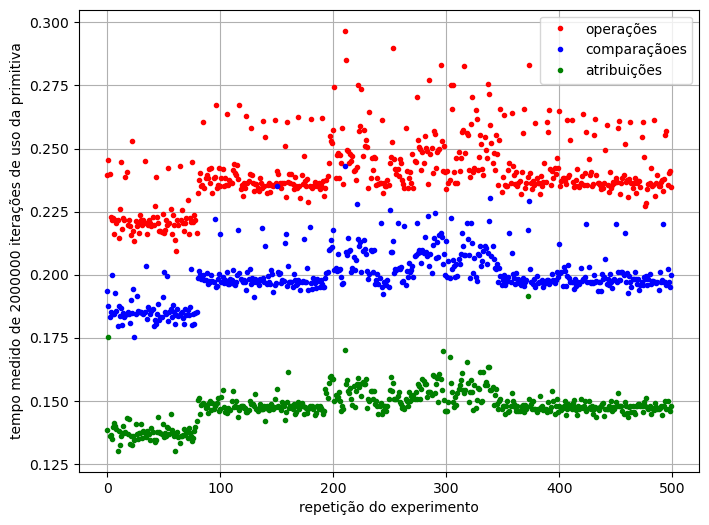

In [7]:
plt.figure(figsize=(8,6))
plt.plot(to,"r.",label="operações")
plt.plot(tc,"b.",label="comparaçãoes")
plt.plot(ta,"g.",label="atribuições")
plt.legend()
plt.xlabel("repetição do experimento")
plt.ylabel("tempo medido de "+str(n)+" iterações de uso da primitiva")
plt.grid()
plt.show()

## análise dos dados brutos
> ## levando em conta que nas aprox. 80 primeiras repetições os tempos foram relativamente menores que os subsequentes, vamos redefinir os tempos médios do experimento, apenas a partir da repetição 80, ou seja 

In [16]:
init_r = 80

to_valid = to[init_r:]
tc_valid = tc[init_r:]
ta_valid = ta[init_r:]

TO =  np.mean(to_valid)
TC =  np.mean(tc_valid)
TA =  np.mean(ta_valid)

print("tempos médios dos loop com",n,"primitivas sucessivas em",R,"repetições = \n[O,C,A] = [",TO,TC,TA,"]")

print("Tempo do estudo: ",(time()-TIC)/60,"minutos")


tempos médios dos loop com 2000000 primitivas sucessivas em 500 repetições = 
[O,C,A] = [ 0.2436793877964928 0.20204382169814336 0.1497810335386367 ]
Tempo do estudo:  47.33087815046311 minutos


## Vamos conferir a distribuição estatística dos dados
> para ver se podemos confiar na média das medições no nosso experimento

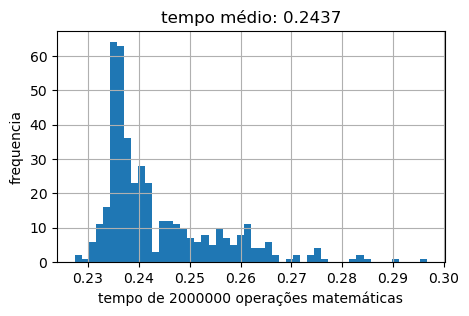

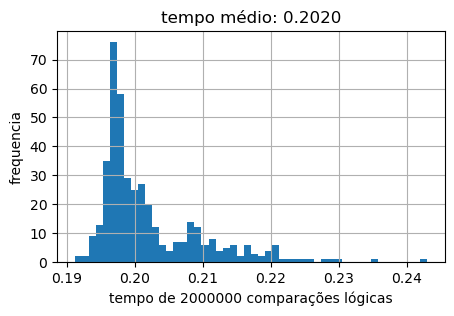

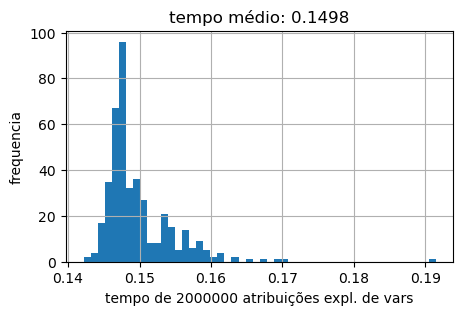

In [18]:
# controle de qualidade - qualitativo
plt.figure(figsize=(5,3))
plt.hist(to_valid,50)
plt.xlabel('tempo de '+str(n)+' operações matemáticas')
plt.ylabel('frequencia')
plt.title("tempo médio: {:.4f}".format(TO))
plt.grid()
plt.show()

plt.figure(figsize=(5,3))
plt.hist(tc_valid,50)
plt.xlabel('tempo de '+str(n)+' comparações lógicas')
plt.ylabel('frequencia')
plt.title("tempo médio: {:.4f}".format(TC))
plt.grid()
plt.show()

plt.figure(figsize=(5,3))
plt.hist(ta_valid,50)
plt.xlabel('tempo de '+str(n)+' atribuições expl. de vars')
plt.ylabel('frequencia')
plt.title("tempo médio: {:.4f}".format(TA))
plt.grid()
plt.show()

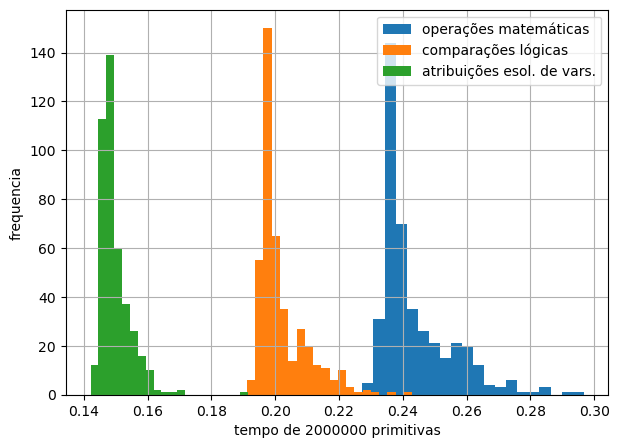

In [19]:
# bistogramas sobrepostos
# controle de qualidade - qualitativo
plt.figure(figsize=(7,5))
plt.hist(to_valid,20,label = 'operações matemáticas')
plt.hist(tc_valid,20,label = 'comparações lógicas')
plt.hist(ta_valid,20,label = 'atribuições esol. de vars.')
plt.xlabel('tempo de '+str(n)+' primitivas')
plt.ylabel('frequencia')
plt.grid()
plt.legend()
plt.show()

# USO DAS FÓRMULAS PARA O CÁLCULO DO TEMPO UNITÁRIO DAS PRIMITIVAS O, C, e A

In [26]:
## SUSBTITUIÇÃO DOS DADOS EXPERIMENTAIS NAS FORMULAS TEÓRICAS
To = (TO-TA) / n
Tc = (TC-TA) / n
Ta = (3*TA - TO - TC) / (3*n+1)  

# criando estruturas de dados mais flexíveis
prim_time = [To, Tc, Ta]
prim_label = ["operação matemática",'comparação lógica','atribuição']

# print("[To,Tc,Ta] = [{:.4g}".format(prim_time[0]),"{:.4g}".format(prim_time[1]),"{:4g}".format(prim_time[2]),"]")

print(prim_label[0]+" To = {:.4g}".format(prim_time[0]))
print(prim_label[1]+" Tc = {:.4g}".format(prim_time[1]))
print(prim_label[2]+" Ta = {:.4g}".format(prim_time[2]))
      

operação matemática To = 4.695e-08
comparação lógica Tc = 2.613e-08
atribuição Ta = 6.033e-10


# Análise Comparativa


In [39]:
min_idx = np.argmin(prim_time)
print("A primitiva mais rápida é a",prim_label[min_idx],\
      " com tempo unitário {:.4g}".format(prim_time[min_idx]),"segundos")
# Encontrando o menor valor na lista
menor_valor = min(prim_time)

# Lista para armazenar os percentuais de diferença
percentuais_diferenca = []

# Calcular o percentual de diferença para cada elemento na lista em relação ao menor valor
for valor in prim_time:
    diferenca = valor - menor_valor
    percentual = (diferenca / menor_valor)
    percentuais_diferenca.append(percentual)

# Exibindo os percentuais de diferença calculados
for i, percentual in enumerate(percentuais_diferenca):
    print(f'A diferença entre {prim_label[min_idx]} e {prim_label[i]} é de {percentual:.2f} vezes')

A primitiva mais rápida é a atribuição  com tempo unitário 6.033e-10 segundos
A diferença entre atribuição e operação matemática é de 76.82 vezes
A diferença entre atribuição e comparação lógica é de 42.31 vezes
A diferença entre atribuição e atribuição é de 0.00 vezes


ta = prim_time[2]

tc = 42 * ta

to = 77 * ta

T = O * 77 * ta + C * 42 * ta + A * ta

T(n) = (77 O(n) + 42 C(n) + A(n) ) * ta # estimativa do tempo 

# equação preditiva

# no nosso caso temos
>TO =  2n * to + n * tc + (3n+1) * ta

>TC =  n * to + 2n * tc + (3n+1) * ta

>TA =  n * to + n * tc + (3n+1) * ta

O(n) = 2n+n+n = 4n

C(n) = n+2n+n = 4n

A(n) = 3(3n+1) = 9n + 3

# então

T(n) = (77 * 4n + 42 * 4n + 9n + 3 ) * ta # estimativa do tempo 

T(n) = (308 n + 168 n + 9n + 3 ) * ta

T(n) = (485 n + 3 ) * ta

